In [65]:
import pandas as pd

fdust_df = pd.read_csv("미세먼지용_데이터셋.csv", encoding="UTF-8")

fdust_df.head()

,datetime,region,pm10,pm25,temperature,wind_direction,wind_speed,precipitation,humidity,aod_avg,aod_max,diesel,electric,gasoline
0,2019-12-31 00:00:00,강남구,22,14,-4.1,286.3,3.5,0.0,50.0,293.569,4000.0,1121920,14952,1607915
1,2019-12-31 00:00:00,강동구,30,17,-4.0,264.9,2.1,0.0,54.0,293.569,4000.0,1121920,14952,1607915
2,2019-12-31 00:00:00,강북구,46,20,-5.6,328.0,5.9,0.0,65.0,293.569,4000.0,1121920,14952,1607915
3,2019-12-31 00:00:00,강서구,32,17,-5.4,324.2,5.1,0.0,65.0,293.569,4000.0,1121920,14952,1607915
4,2019-12-31 00:00:00,관악구,26,13,-5.2,331.4,3.4,0.0,62.0,293.569,4000.0,1121920,14952,1607915


In [66]:
df1 = fdust_df[['datetime', 'region', 'pm10', 'pm25']]

df1.head()

,datetime,region,pm10,pm25
0,2019-12-31 00:00:00,강남구,22,14
1,2019-12-31 00:00:00,강동구,30,17
2,2019-12-31 00:00:00,강북구,46,20
3,2019-12-31 00:00:00,강서구,32,17
4,2019-12-31 00:00:00,관악구,26,13


In [67]:
df1['region'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '중구', '중랑구', '종로구'], dtype=object)

In [68]:
#동부 - 중랑구
jungnang_df = df1[df1['region'] == '중랑구'].copy()
#서부 - 구로구
guro_df = df1[df1['region'] == '구로구'].copy()
#남부 - 관악구
gwanak_df = df1[df1['region'] == '관악구'].copy()
#북부 - 강북구
gangbuk_df = df1[df1['region'] == '강북구'].copy()
#중앙부 - 용산구
yongsan_df = df1[df1['region'] == '용산구'].copy()
#서울평균
seoul_df = df1.groupby('datetime')[['pm10', 'pm25']].mean().reset_index().copy()

import numpy as np
#값 반올림
seoul_df['pm10'] = np.ceil(seoul_df['pm10']).astype(int)
seoul_df['pm25'] = np.ceil(seoul_df['pm25']).astype(int)

In [69]:
# datetime 컬럼이 datetime 타입이 아닐 경우 변환
df_list = [jungnang_df, guro_df, gwanak_df, gangbuk_df, yongsan_df, seoul_df]

for df in df_list:
    df['datetime'] = pd.to_datetime(df['datetime'])

In [70]:
# 숫자형 컬럼만 선택
numeric_cols = jungnang_df.select_dtypes(include='number').columns.tolist()


# datetime 기준으로 숫자형 컬럼 평균값 집계
jungnang_grouped = jungnang_df.groupby('datetime')[numeric_cols].mean().reset_index()
guro_grouped = guro_df.groupby('datetime')[numeric_cols].mean().reset_index()
gwanak_grouped = gwanak_df.groupby('datetime')[numeric_cols].mean().reset_index()
gangbuk_grouped = gangbuk_df.groupby('datetime')[numeric_cols].mean().reset_index()
yongsan_grouped = yongsan_df.groupby('datetime')[numeric_cols].mean().reset_index()
seoul_grouped = seoul_df.groupby('datetime')[numeric_cols].mean().reset_index()

# datetime 기준으로 오름차순 정렬
jungnang_grouped.sort_values(by='datetime', inplace=True)
guro_grouped.sort_values(by='datetime', inplace=True)
gwanak_grouped.sort_values(by='datetime', inplace=True)
gangbuk_grouped.sort_values(by='datetime', inplace=True)
yongsan_grouped.sort_values(by='datetime', inplace=True)
seoul_grouped.sort_values(by='datetime', inplace=True)

In [71]:
import statsmodels.api as sm

result1 = sm.tsa.seasonal_decompose(jungnang_grouped['pm10'], model='additive', period=8760)
result2 = sm.tsa.seasonal_decompose(jungnang_grouped['pm25'], model='additive', period=8760)

result3 = sm.tsa.seasonal_decompose(guro_grouped['pm10'], model='additive', period=8760)
result4 = sm.tsa.seasonal_decompose(guro_grouped['pm25'], model='additive', period=8760)

result5 = sm.tsa.seasonal_decompose(gwanak_grouped['pm10'], model='additive', period=8760)
result6 = sm.tsa.seasonal_decompose(gwanak_grouped['pm25'], model='additive', period=8760)

result7 = sm.tsa.seasonal_decompose(gangbuk_grouped['pm10'], model='additive', period=8760)
result8 = sm.tsa.seasonal_decompose(gangbuk_grouped['pm25'], model='additive', period=8760)

result9 = sm.tsa.seasonal_decompose(yongsan_grouped['pm10'], model='additive', period=8760)
result10 = sm.tsa.seasonal_decompose(yongsan_grouped['pm25'], model='additive', period=8760)

result11 = sm.tsa.seasonal_decompose(seoul_grouped['pm10'], model='additive', period=8760)
result12 = sm.tsa.seasonal_decompose(seoul_grouped['pm25'], model='additive', period=8760)

In [72]:
name_dict = {'jungnang_grouped': 'Jungnang', 'guro_grouped': 'Guro', 'gwanak_grouped': 'Gwanak', 'gangbuk_grouped': 'Gangbuk', 'yongsan_grouped': 'Yongsan', 'seoul_grouped': 'Seoul'}

In [73]:
def make_plot(result, df, region_key=None, name_dict=name_dict, title=None, label='Observed', ylabel=None):
    
    import matplotlib.pyplot as plt
    from matplotlib.dates import DateFormatter, YearLocator

    region_name = name_dict.get(region_key, "")
    column_name = result.observed.name

    if title is None:
        title = f"{region_name} - {column_name.upper()} Data"
    if ylabel is None:
        ylabel = column_name.upper()

    #그림과 축 생성
    fig, ax = plt.subplots(figsize=(14, 6))

    # 선형 그래프
    #ax.plot(df.index, result.observed, color='blue', label='Observed')
    #ax.plot(df.index, result.seasonal, color='green', label='Seasonal')
    #ax.plot(df.index, result.trend, color='orange', label='Trend')

    aligned = pd.DataFrame({'observed': result.observed, 'seasonal': result.seasonal, 'trend': result.trend}).dropna()

    ax.plot(aligned.index, aligned['observed'], color='blue', label=label)
    ax.plot(aligned.index, aligned['seasonal'], color='green', label='Seasonal')
    ax.plot(aligned.index, aligned['trend'], color='orange', label='Trend')

    # 눈금 설정: 20년 간격, 연도 형식
    ax.xaxis.set_major_locator(YearLocator(1))  # 1년 단위 눈금
    ax.xaxis.set_major_formatter(DateFormatter('%Y'))  # YYYY 형식 

    # 레이블, 제목
    ax.set_xlabel('Dates')
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    # 눈금 회전
    plt.xticks(rotation=45)


    # 범례, 그리드, 레이아웃
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

    # seasonal decomposition 결과 시각화
    result.plot()
    plt.suptitle("Seasonal Decomposition (Period=11)", fontsize=14)
    plt.tight_layout()
    plt.show()

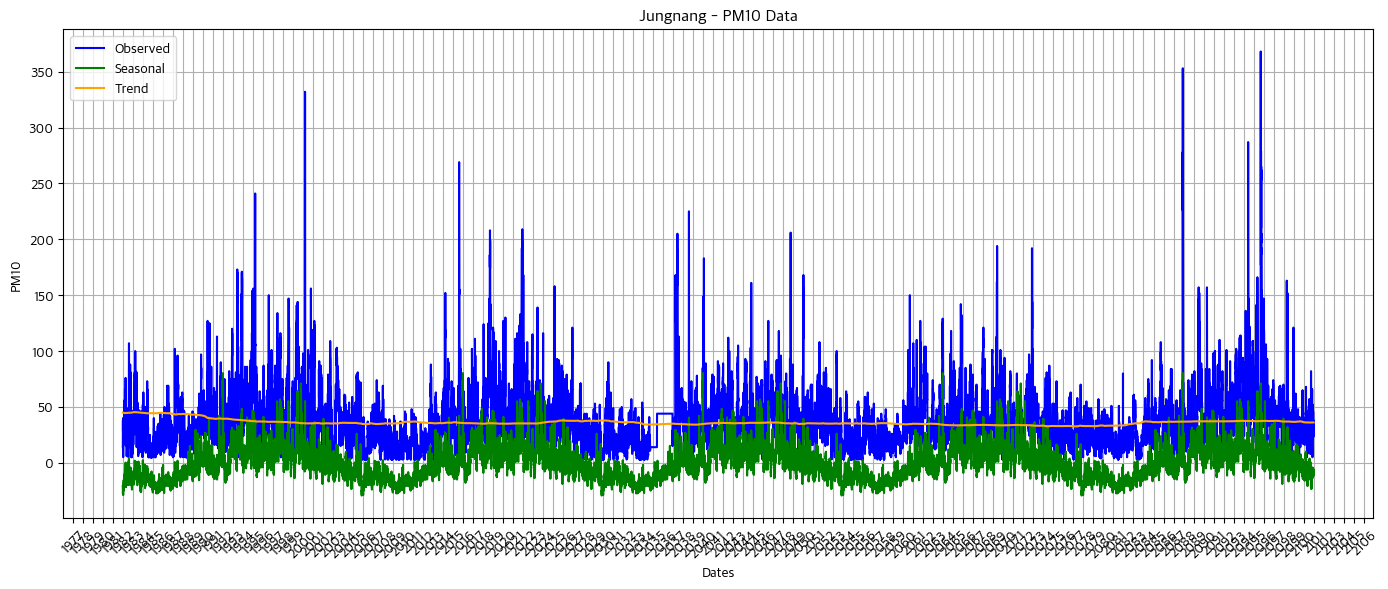

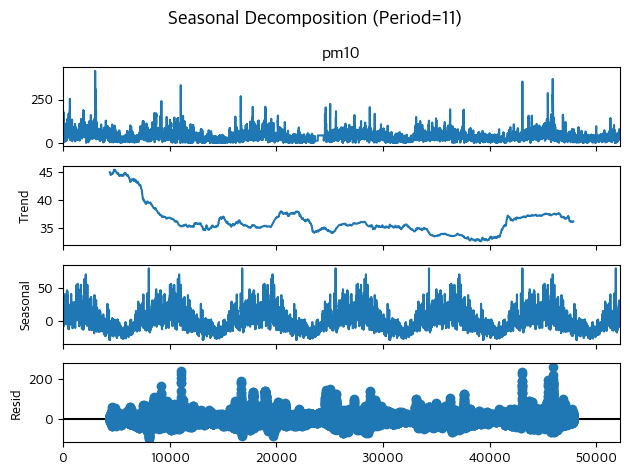

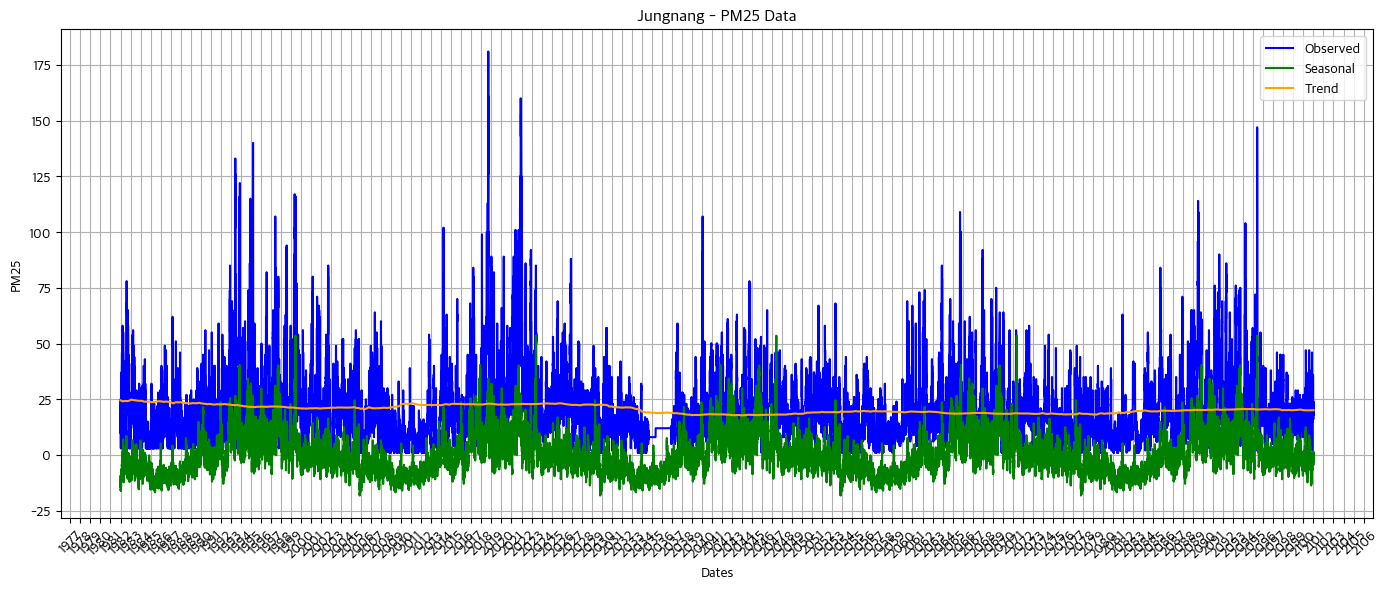

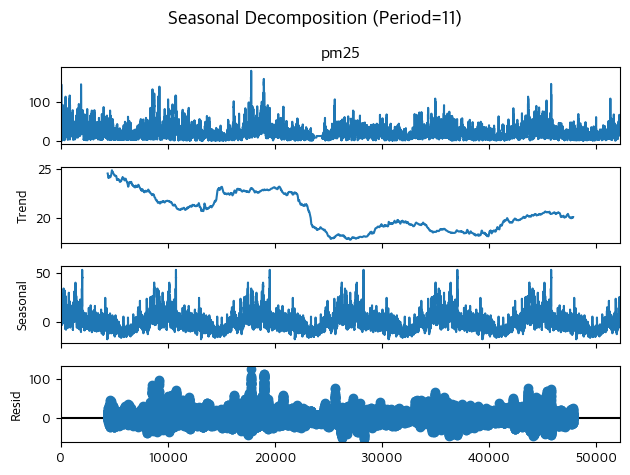

In [74]:
make_plot(result1, jungnang_grouped, region_key='jungnang_grouped')
make_plot(result2, jungnang_grouped, region_key='jungnang_grouped')

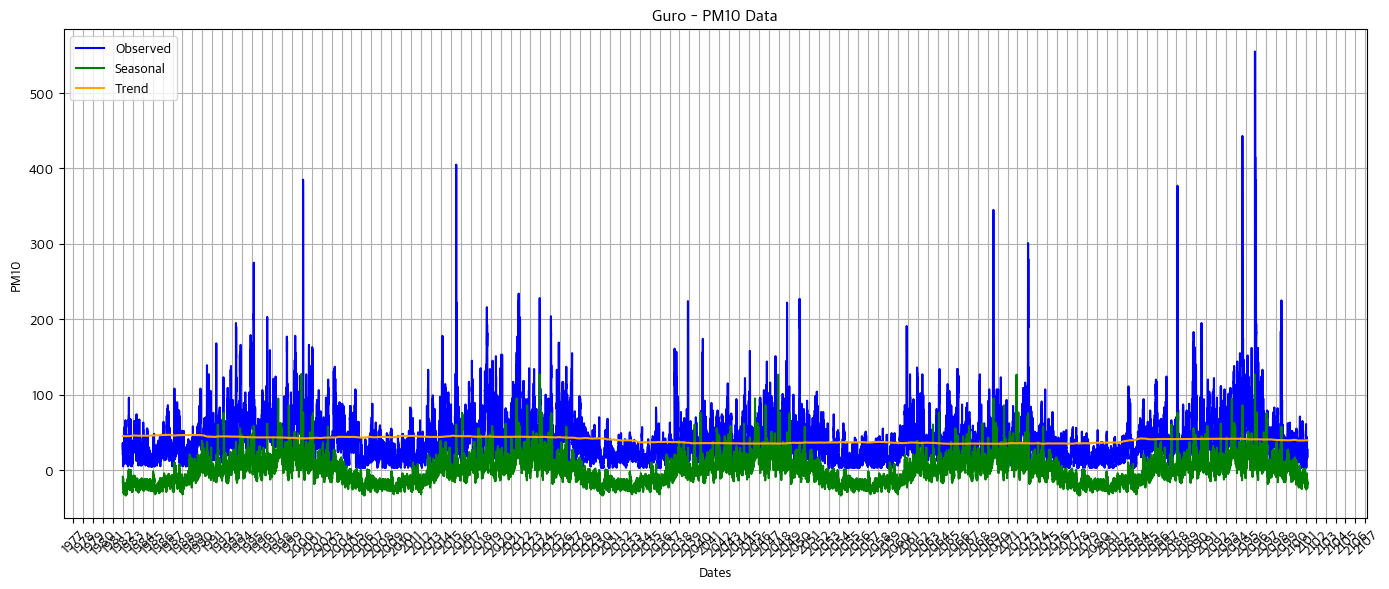

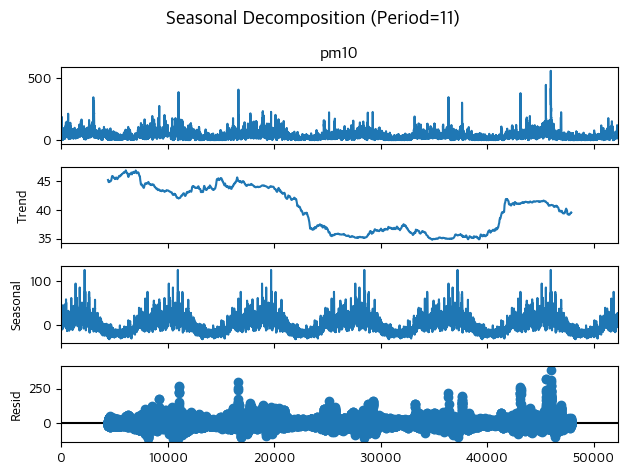

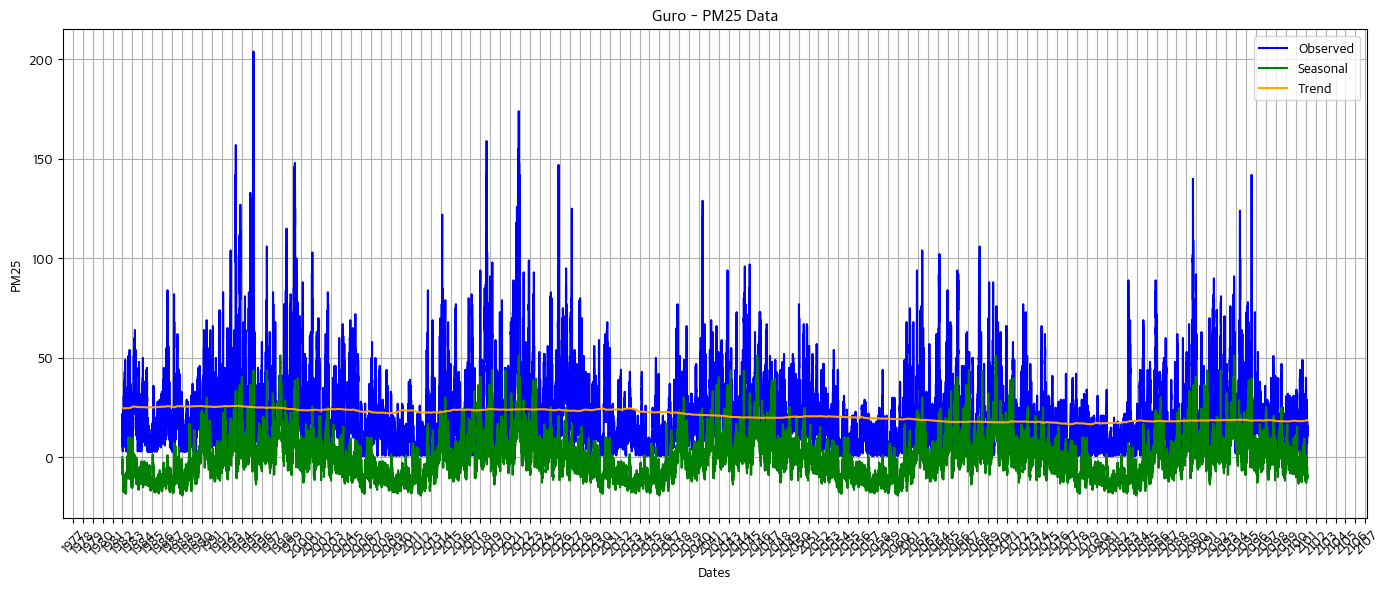

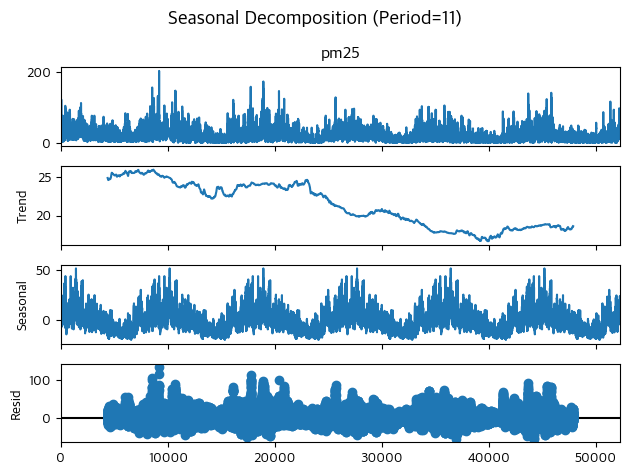

In [75]:
make_plot(result3, guro_grouped, region_key='guro_grouped')
make_plot(result4, guro_grouped, region_key='guro_grouped')

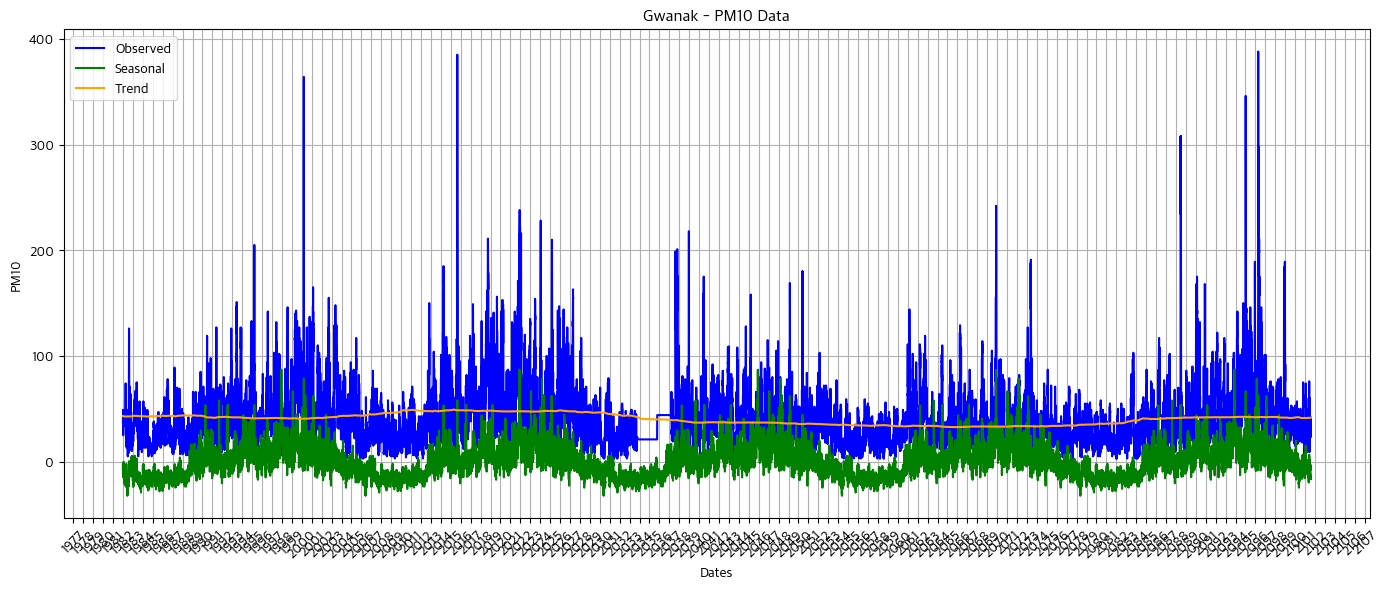

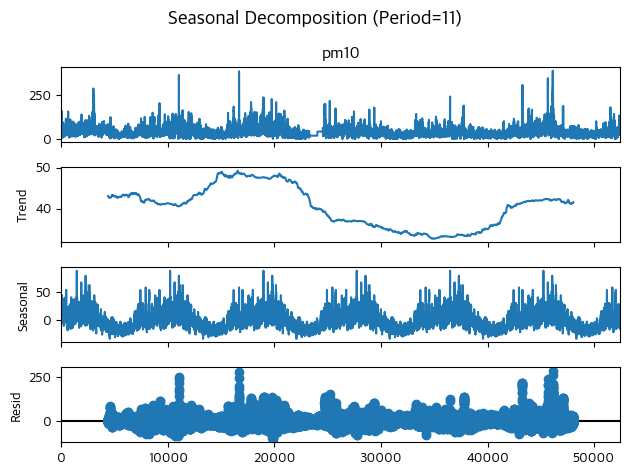

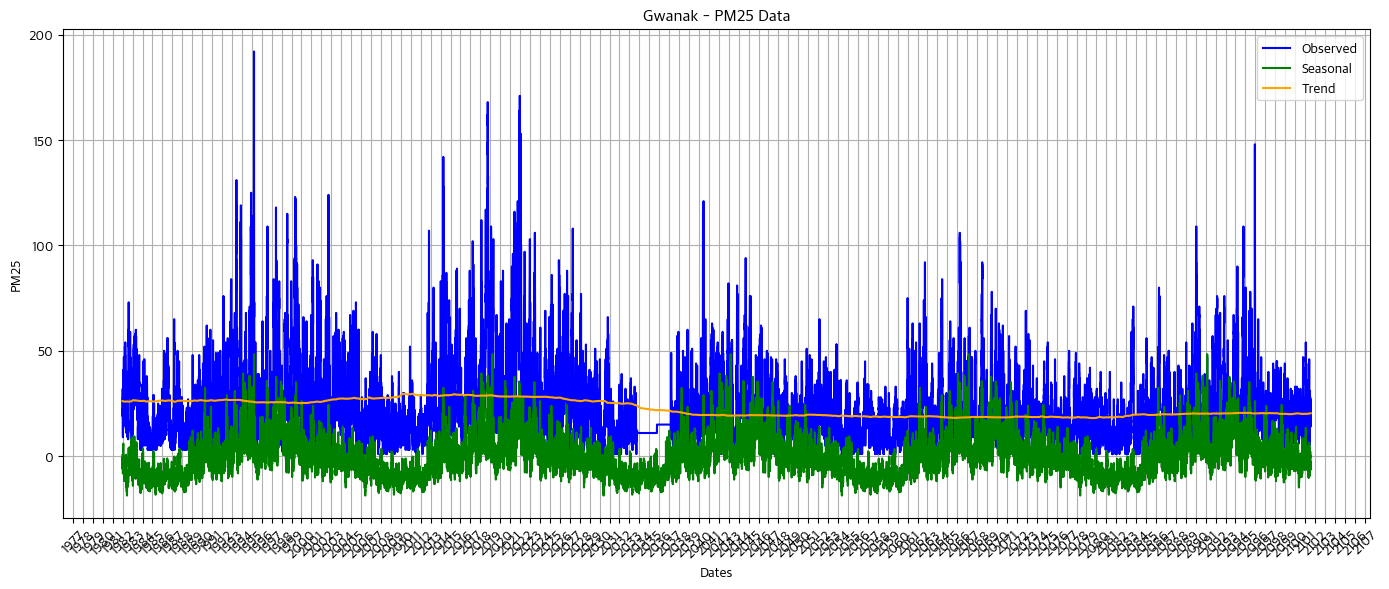

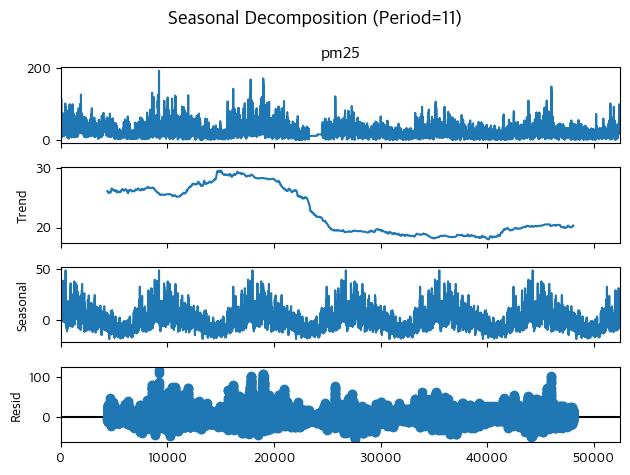

In [76]:
make_plot(result5, gwanak_grouped, region_key='gwanak_grouped')
make_plot(result6, gwanak_grouped, region_key='gwanak_grouped')

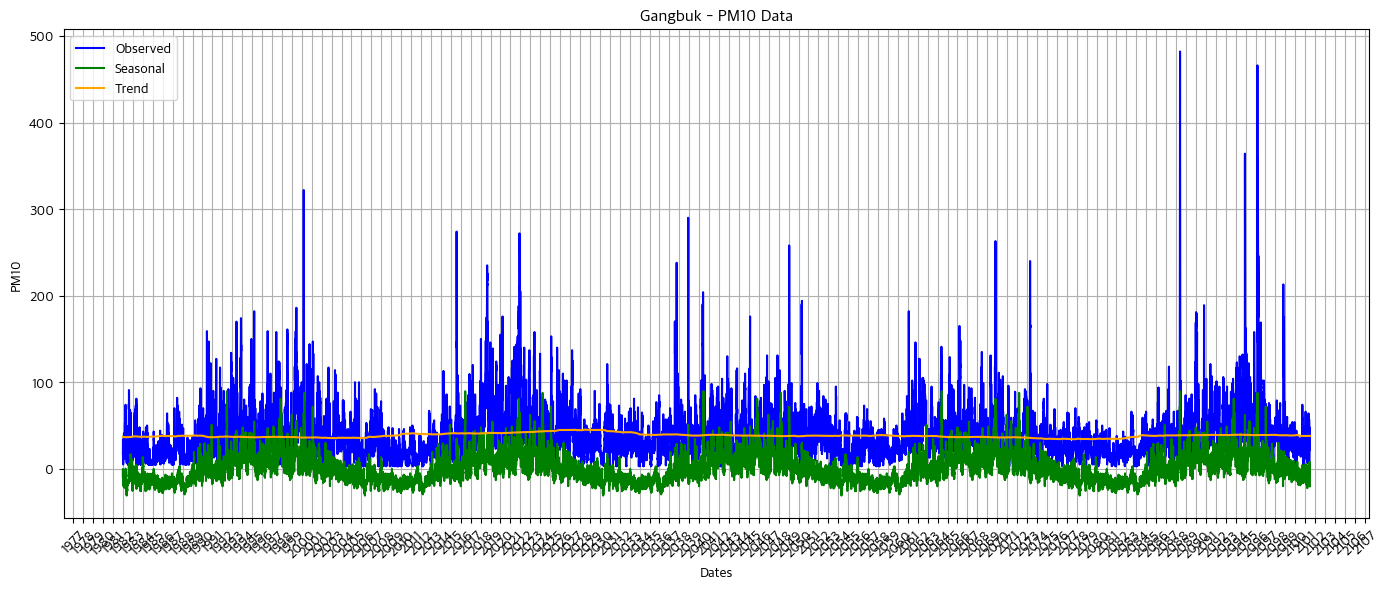

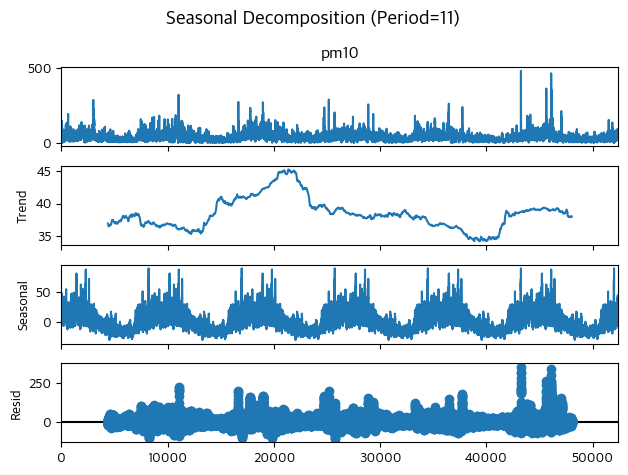

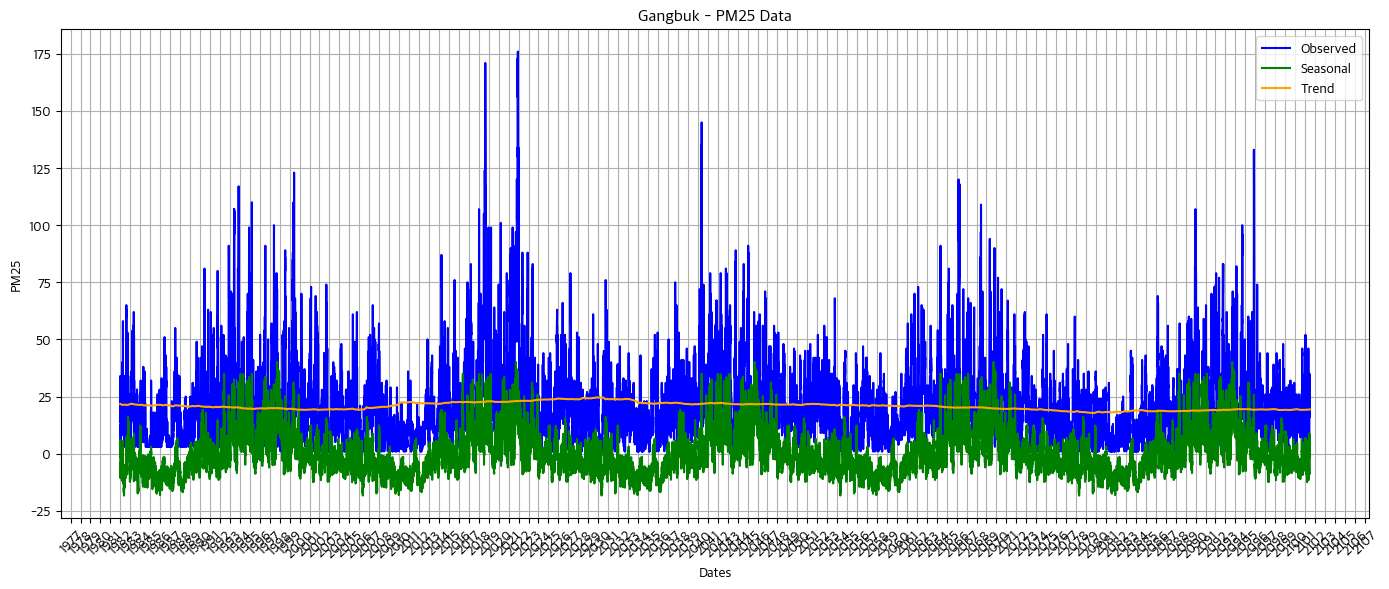

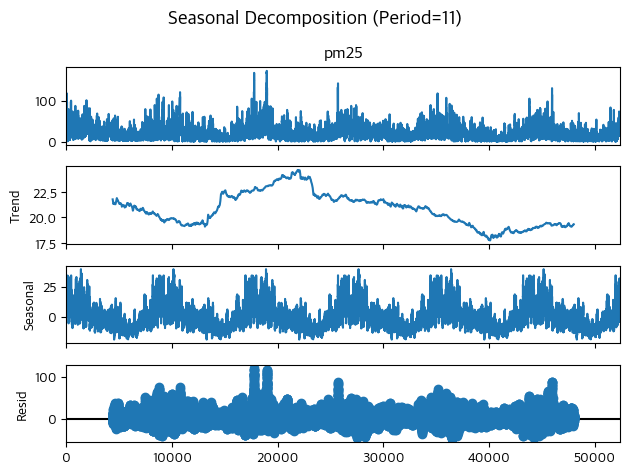

In [77]:
make_plot(result7, gangbuk_grouped, region_key='gangbuk_grouped')
make_plot(result8, gangbuk_grouped, region_key='gangbuk_grouped')

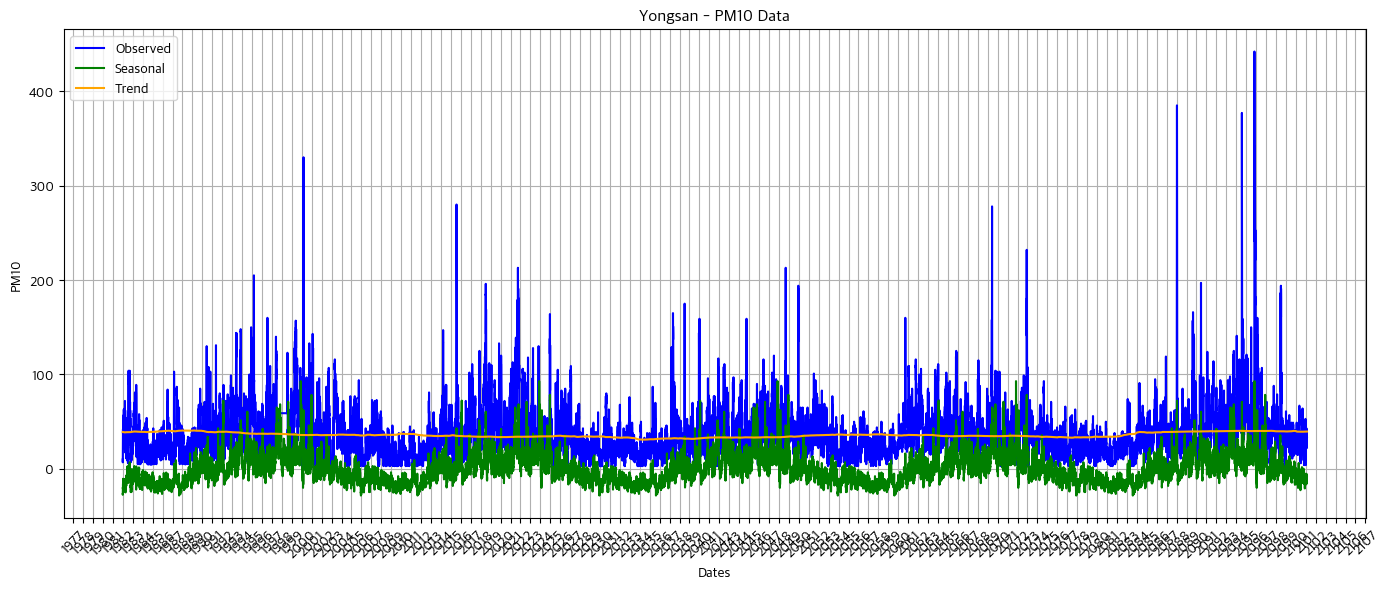

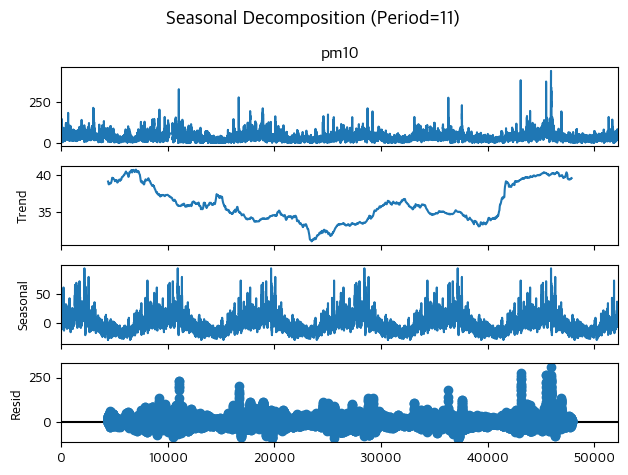

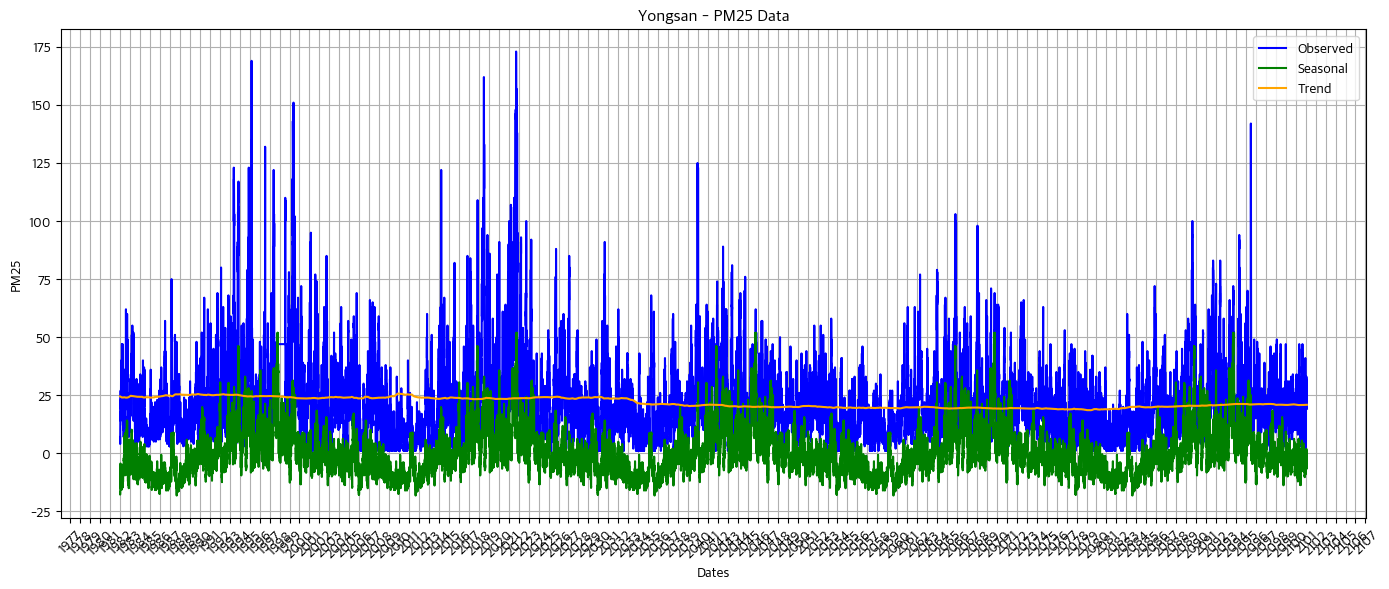

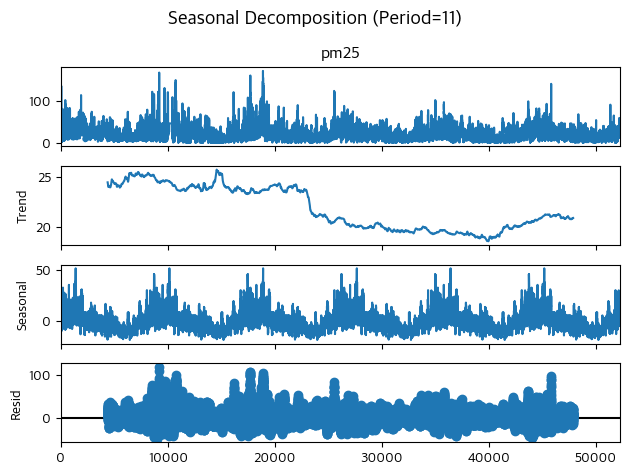

In [78]:
make_plot(result9, yongsan_grouped, region_key='yongsan_grouped')
make_plot(result10, yongsan_grouped, region_key='yongsan_grouped')

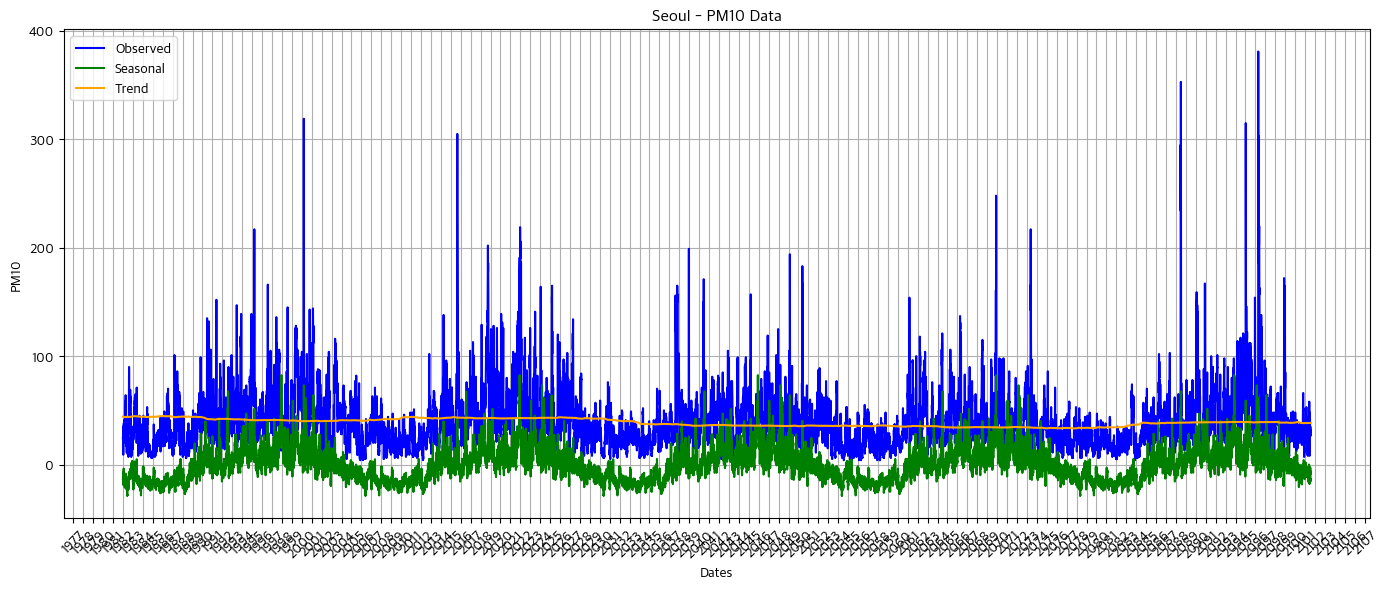

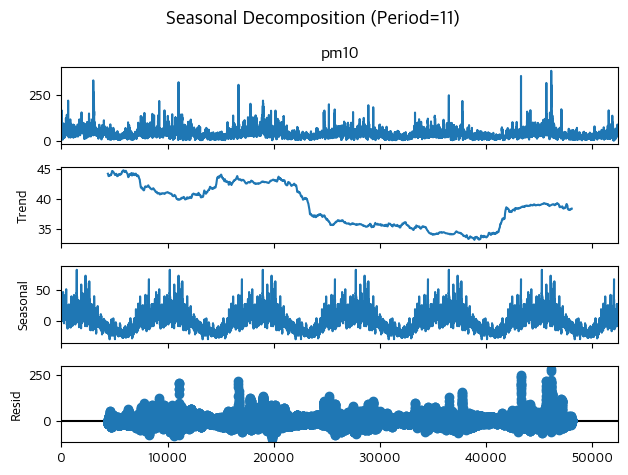

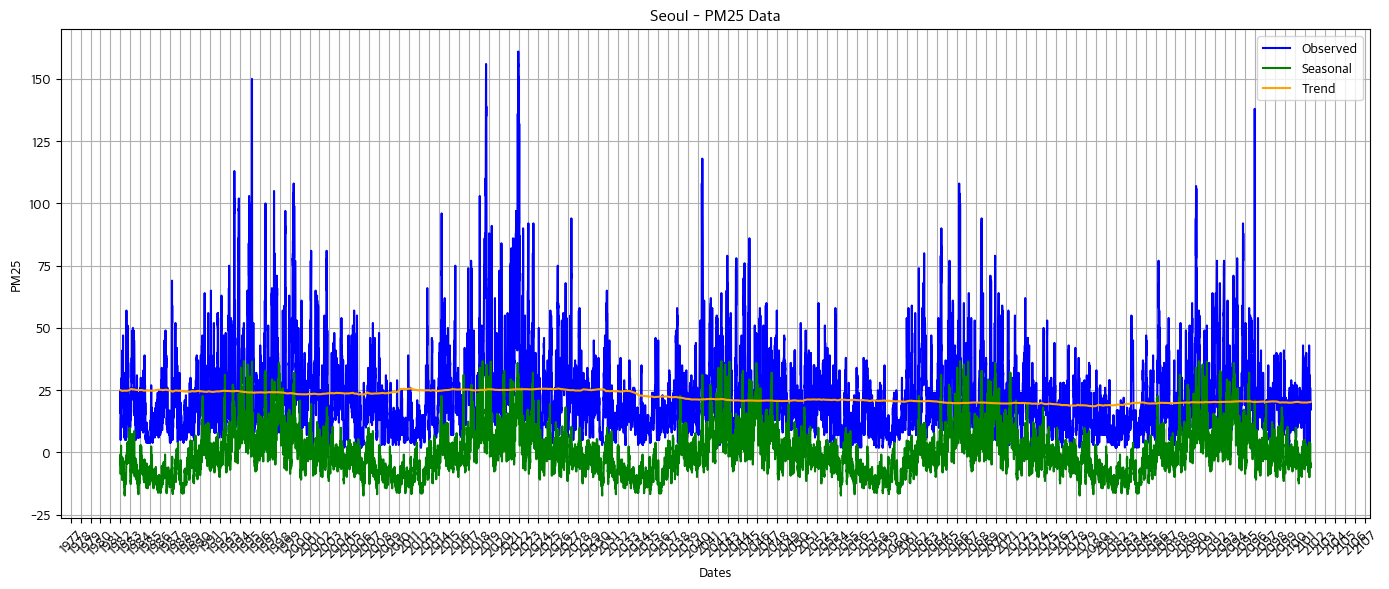

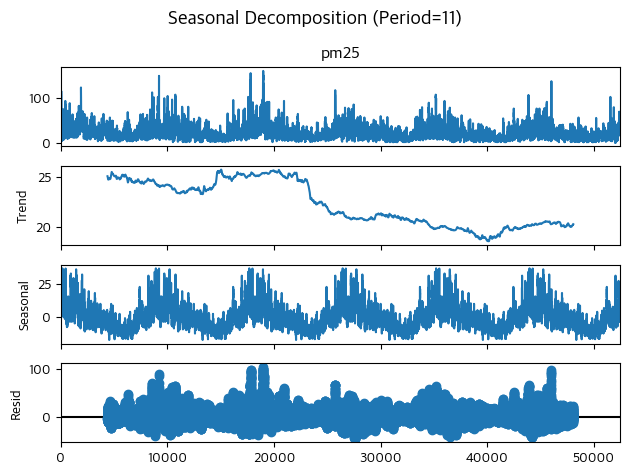

In [79]:
make_plot(result11, seoul_grouped, region_key='seoul_grouped')
make_plot(result12, seoul_grouped, region_key='seoul_grouped')